In [4]:
# upload files
!ls
from google.colab import files
myFile= files.upload()

sample_data


Saving y.csv to y.csv
Saving X_t.csv to X_t.csv
Saving X.csv to X.csv


In [94]:
# read the files
!ls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GMM


import warnings
warnings.filterwarnings('ignore')

Xdf= pd.read_csv('X.csv',header=None,delimiter=" ")
ydf= pd.read_csv('y.csv',header=None,delimiter=" ")
X_tdf= pd.read_csv('X_t.csv',header=None,delimiter=" ")
Xdf=Xdf.drop(0,axis=1)
X_tdf=X_tdf.drop(0,axis=1)


Xdf_v=Xdf.values
Xdf.values.shape

sample_data  X.csv  X_t.csv  y.csv


(180, 13)

In [0]:
# split the labeled data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdf_v,ydf.values, test_size=0.3) # 80% training and 20% test

In [0]:
# evaluate the errors corresponding to the different K values used in KNN classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
acc=[]

for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, y_pred))
 



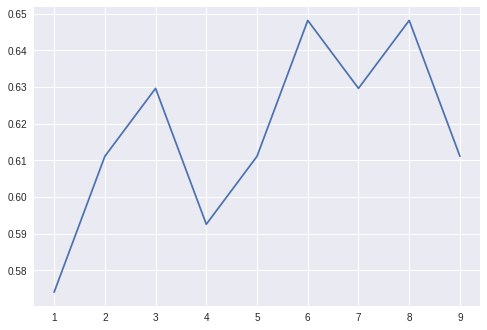

In [103]:
# plot the errors corresponding to each k value
import matplotlib.pyplot as plt

kv=list(range(1,10))
plt.plot(kv, acc,label='line 1')


In [104]:
  knn = KNeighborsClassifier(n_neighbors=8)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print(metrics.accuracy_score(y_test, y_pred))

0.6481481481481481


In [105]:
# the best K result correspond to K=8, so it was choosen
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(Xdf_v,ydf.values)
y_my_pred= knn.predict(X_tdf.values)
y_my_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [167]:
from sklearn.neighbors.base import _check_weights, _get_weights

# predict_proba from https://github.com/scikit-learn/scikit-learn/blob/bac89c2/sklearn/neighbors/classification.py#L164

def predict_proba(knn, X):
    neigh_dist, neigh_ind = knn.kneighbors(X)
    print ("[1]",neigh_dist.shape)
    print ("[2]",neigh_ind.shape)
    classes_ = knn.classes_
    print("[3]",classes_)
    _y = knn._y
    print("[4]",_y.shape)
    if not knn.outputs_2d_:
      _y = knn._y.reshape((-1, 1))
      classes_ = [knn.classes_]
      print("[5]","we are here")
      print("[6]",_y.shape)
      print("[7]",classes_)
      n_outputs = len(classes_)
      n_samples = X.shape[0]
      weights = _get_weights(neigh_dist, knn.weights)
      print("[8]",weights)
      print("[9]",knn.weights)
    if weights is None:
       weights = np.ones_like(neigh_ind)
       print("[10]","we are here again") 
       print("[11]",weights.shape)
    probabilities = []
    for k, classes_k in enumerate(classes_):
      pred_labels = _y[:, k][neigh_ind]      
      print("[12]",k,classes_k)
      print("[12.1]",pred_labels[0])
      all_rows = np.arange(X.shape[0])
      proba_k = np.zeros((n_samples, classes_k.size))
      print("[13]",proba_k.shape)
      for i, idx in enumerate(pred_labels.T):  
        proba_k[all_rows, idx] += weights[:, i]
      
      print("[14]",proba_k[0])
      normalizer = proba_k.sum(axis=1)[:, np.newaxis]
      print("[15]" ,normalizer.shape)
      print("[16]",normalizer[0])
      normalizer[normalizer == 0.0] = 1.0
      proba_k /= normalizer
      print("[17]",proba_k)
      probabilities.append(proba_k)

    
#predict_proba(knn,X_tdf.values)

[1] (90, 8)
[2] (90, 8)
[3] [0 1]
[4] (180,)
[5] we are here
[6] (180, 1)
[7] [array([0, 1])]
[8] None
[9] uniform
[10] we are here again
[11] (90, 8)
[12] 0 [0 1]
[12.1] [1 0 0 1 0 0 0 1]
[13] (90, 2)
[14] [5. 3.]
[15] (90, 1)
[16] [8.]
[17] [[0.625 0.375]
 [0.875 0.125]
 [0.375 0.625]
 [0.625 0.375]
 [0.5   0.5  ]
 [1.    0.   ]
 [0.5   0.5  ]
 [0.375 0.625]
 [0.625 0.375]
 [0.5   0.5  ]
 [0.875 0.125]
 [0.875 0.125]
 [1.    0.   ]
 [0.375 0.625]
 [0.75  0.25 ]
 [0.75  0.25 ]
 [0.75  0.25 ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.875 0.125]
 [0.375 0.625]
 [0.5   0.5  ]
 [0.875 0.125]
 [0.875 0.125]
 [0.875 0.125]
 [0.25  0.75 ]
 [0.875 0.125]
 [0.625 0.375]
 [0.75  0.25 ]
 [0.875 0.125]
 [0.25  0.75 ]
 [0.625 0.375]
 [0.375 0.625]
 [0.75  0.25 ]
 [0.5   0.5  ]
 [0.625 0.375]
 [0.75  0.25 ]
 [0.75  0.25 ]
 [0.625 0.375]
 [0.625 0.375]
 [0.25  0.75 ]
 [0.875 0.125]
 [0.375 0.625]
 [0.75  0.25 ]
 [0.25  0.75 ]
 [1.    0.   ]
 [0.75  0.25 ]
 [0.375 0.625]
 [0.625 0.375]
 [0.875 0.125]
 [0.875

In [173]:
knn.predict_proba(X_tdf.values).max(axis=1)


array([0.625, 0.875, 0.625, 0.625, 0.5  , 1.   , 0.5  , 0.625, 0.625,
       0.5  , 0.875, 0.875, 1.   , 0.625, 0.75 , 0.75 , 0.75 , 0.5  ,
       0.5  , 0.875, 0.625, 0.5  , 0.875, 0.875, 0.875, 0.75 , 0.875,
       0.625, 0.75 , 0.875, 0.75 , 0.625, 0.625, 0.75 , 0.5  , 0.625,
       0.75 , 0.75 , 0.625, 0.625, 0.75 , 0.875, 0.625, 0.75 , 0.75 ,
       1.   , 0.75 , 0.625, 0.625, 0.875, 0.875, 0.625, 0.75 , 0.875,
       0.5  , 0.625, 0.75 , 0.5  , 0.625, 0.5  , 0.75 , 0.625, 0.875,
       0.75 , 0.625, 0.625, 0.75 , 0.625, 0.5  , 0.75 , 0.875, 0.875,
       0.875, 0.75 , 0.875, 0.75 , 0.75 , 0.625, 0.625, 0.5  , 0.625,
       0.875, 0.625, 0.875, 0.75 , 0.625, 0.625, 0.875, 0.625, 0.875])

In [0]:
import pandas

val=knn.predict_proba(X_tdf.values).max(axis=1)
mySF= pandas.DataFrame((val)).to_csv("results.csv")
mySF=files.download("results.csv")